Key findings within this notebook experiment:

1. Feature engineering (polynomial features, add more features, etc) DONE
2. Cross-validation test => for validation set
3. Do feature importance and coefficients per industry DONE

Next step:
1. Add features from ONS

In [29]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 20)

In [30]:
scores_table_in_company = pd.read_csv("feature-eng-data/scores_table_in_company.csv", low_memory=False)

In [31]:
scores_table_in_company.shape

(879, 27)

In [32]:
scores_table_in_company.head(3)

,CompanyNumber,RegAddress_PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,SIC,AssetsM,EstAssetsM,TurnoverM,EstTurnoverM,FTE,EstFTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,S1S2CO2e
0,00019457,M22 5TG,Public Limited Company,Active,United Kingdom,329,3152.0,0.038998,603.3,1.571170,3152.0,4.0,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723,47.63
1,00024869,GL3 4AW,Public Limited Company,Active,United Kingdom,6512,1048.0,0.073508,486.0,1.357635,1048.0,4.0,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129,269.00
2,00029559,TN15 7AE,Public Limited Company,Active,United Kingdom,701,76060.0,0.149742,291.2,8.971006,76060.0,2.0,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054,219927.00


In [33]:
scores_table_in_company["S1S2CO2e"].describe()

count    8.790000e+02
mean     2.892892e+08
std      8.503005e+09
min      0.000000e+00
25%      2.509600e+02
50%      1.492600e+03
75%      1.276200e+04
max      2.520920e+11
Name: S1S2CO2e, dtype: float64

<Axes: xlabel='S1S2CO2e'>

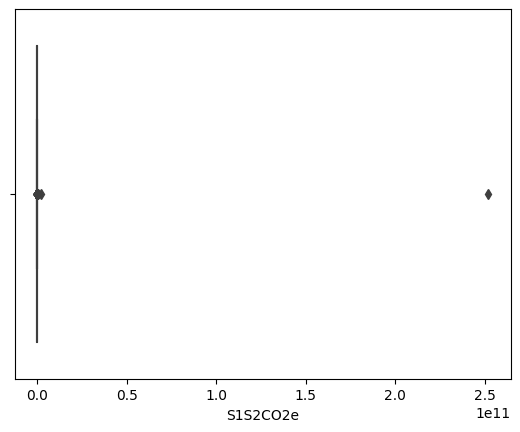

In [34]:
import seaborn as sns

# assuming scores_table_in_company is your DataFrame
sns.boxplot(x=scores_table_in_company["S1S2CO2e"])

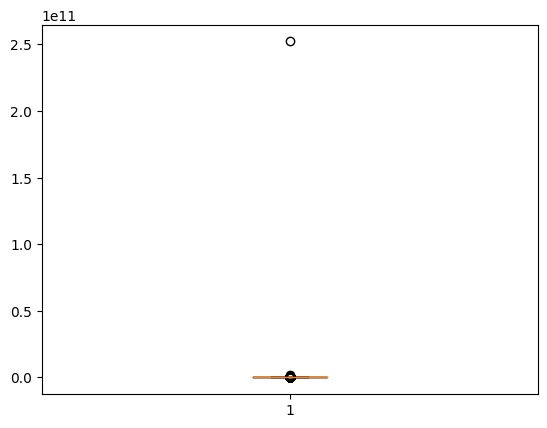

In [35]:
import matplotlib.pyplot as plt

# assuming scores_table_in_company is your DataFrame
plt.boxplot(scores_table_in_company["S1S2CO2e"].dropna())
plt.show()

In [36]:
scores_table_in_company = scores_table_in_company[scores_table_in_company["S1S2CO2e"]<500000]

scores_table_in_company = scores_table_in_company[scores_table_in_company["AssetsM"]<175216.5]

In [37]:
scores_table_in_company.shape

(766, 27)

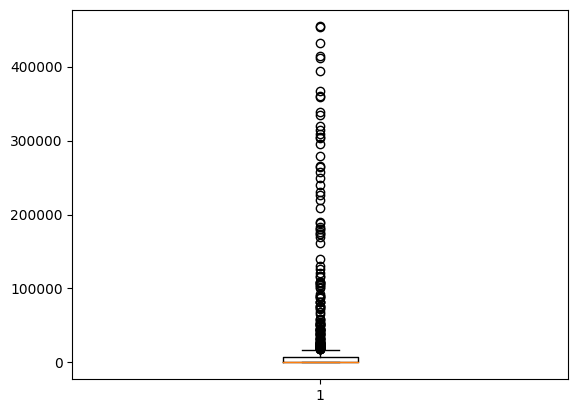

In [38]:
import matplotlib.pyplot as plt

# assuming scores_table_in_company is your DataFrame
plt.boxplot(scores_table_in_company["S1S2CO2e"].dropna())
plt.show()

In [39]:
scores_table_in_company_matrix = scores_table_in_company.drop(columns=["RegAddress_PostCode", "CompanyCategory", "CompanyStatus", "CountryOfOrigin"])

# set 'CompanyNumber' as the index
scores_table_in_company_matrix.set_index('CompanyNumber', inplace=True)

In [40]:
scores_table_in_company_matrix

,SIC,AssetsM,EstAssetsM,TurnoverM,EstTurnoverM,FTE,EstFTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,
00019457,329,3152.0,0.038998,603.300000,1.571170,3152.0,4.0,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723,47.63
00024869,6512,1048.0,0.073508,486.000000,1.357635,1048.0,4.0,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129,269.00
00029559,701,76060.0,0.149742,291.200000,8.971006,76060.0,2.0,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054,219927.00
00030226,1712,584.0,0.320794,104.600000,16.076656,584.0,10.0,Actuals,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,574.223656,39186.00
00033774,2059,4017.0,0.170615,15700.000000,13.853500,4017.0,4.0,Actuals,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,2426.440525,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,64202,381.0,20.194410,37.473996,NaN,381.0,NaN,Actuals,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5.0,5.0,5.0,2.0,5.0,123.837290,0.00
SC367563,8299,1125.0,0.016182,108.500000,0.067786,1125.0,2.0,Actuals,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.0,6.0,6.0,1.148973,2272.20
SC419949,64921,0.0,0.000000,29.375452,68.728740,0.0,NaN,Actuals,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,NaN,2.0,6.0,132.280591,771.00


In [41]:
scores_table_in_company_matrix_sic = scores_table_in_company_matrix["SIC"]
scores_table_in_company_matrix_sic

CompanyNumber
00019457      329
00024869     6512
00029559      701
00030226     1712
00033774     2059
            ...  
SC334329    64202
SC367563     8299
SC419949    64921
SC440783     1011
SC578050    46431
Name: SIC, Length: 766, dtype: object

In [42]:
scores_table_in_company_matrix_S1S2TesCO2eEst = scores_table_in_company_matrix["S1S2TesCO2eEst"]
scores_table_in_company_matrix_S1S2TesCO2eEst

CompanyNumber
00019457       4.752723
00024869       1.300129
00029559       4.977054
00030226     574.223656
00033774    2426.440525
               ...     
SC334329     123.837290
SC367563       1.148973
SC419949     132.280591
SC440783     760.275821
SC578050    6554.077348
Name: S1S2TesCO2eEst, Length: 766, dtype: float64

In [43]:
scores_table = scores_table_in_company_matrix.drop(columns=["CalculationType", "SIC", "S1S2TesCO2eEst", "EstAssetsM", "EstTurnoverM", "EstFTE"])
scores_table.head()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,
00019457,3152.0,603.3,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,47.63
00024869,1048.0,486.0,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,269.00
00029559,76060.0,291.2,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,219927.00
00030226,584.0,104.6,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,39186.00
00033774,4017.0,15700.0,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,431311.00


In [44]:
missing_values = scores_table.isna().sum()
print(missing_values)

AssetsM                          0
TurnoverM                        0
FTE                              0
IR_CO2ePerAssetsM                0
IR_CO2ePerTurnoverM              0
IR_CO2ePerFTE                    0
DefraRatio                      10
NormalisedIrCO2ePerAssetsM      10
NormalisedIrCO2ePerTurnoverM    10
NormalisedIrCO2ePerFTE          10
ScoreC1a                         0
ScoreC1t                         6
ScoreC1f                        43
ScoreC2                          7
ScoreC1                          6
S1S2CO2e                         0
dtype: int64


In [45]:
scores_table.describe()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,766.000000,760.000000,723.000000,759.000000,760.000000,766.000000
mean,4289.134634,890.410810,4289.134634,723.249969,427.695733,99.173524,1.569726,88.414665,3.960800e+01,7.726939e+00,5.701044,5.800000,5.195021,5.069829,5.309211,21977.424722
std,14051.864906,3560.364803,14051.864906,8767.514069,8250.402957,876.718596,7.400178,0.000000,7.110131e-15,1.777533e-15,2.763095,2.726825,2.528919,2.174237,2.437718,64710.107373
min,0.000000,0.043317,0.000000,0.004295,0.000000,0.000000,0.037500,88.414665,3.960800e+01,7.726939e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,139.250000,45.613176,139.250000,10.202926,4.402509,0.705485,0.125000,88.414665,3.960800e+01,7.726939e+00,3.000000,3.000000,3.000000,4.000000,3.000000,223.000000
50%,460.500000,91.066500,460.500000,34.789544,16.950000,3.222714,0.375000,88.414665,3.960800e+01,7.726939e+00,6.000000,6.000000,5.000000,5.000000,5.000000,1216.850000
75%,1812.500000,350.050000,1812.500000,134.668474,52.877446,9.891508,0.875000,88.414665,3.960800e+01,7.726939e+00,8.000000,8.000000,7.000000,6.000000,7.000000,7210.260000
max,155000.000000,47150.000000,155000.000000,217037.037037,226923.741935,16847.666667,99.750000,88.414665,3.960800e+01,7.726939e+00,10.000000,10.000000,9.000000,10.000000,10.000000,454154.000000


In [46]:
# fill missing values with the mean of each column
scores_table.fillna(scores_table.mean(), inplace=True)
missing_values = scores_table.isna().sum()
print(missing_values)

AssetsM                         0
TurnoverM                       0
FTE                             0
IR_CO2ePerAssetsM               0
IR_CO2ePerTurnoverM             0
IR_CO2ePerFTE                   0
DefraRatio                      0
NormalisedIrCO2ePerAssetsM      0
NormalisedIrCO2ePerTurnoverM    0
NormalisedIrCO2ePerFTE          0
ScoreC1a                        0
ScoreC1t                        0
ScoreC1f                        0
ScoreC2                         0
ScoreC1                         0
S1S2CO2e                        0
dtype: int64


In [51]:
scores_table.shape

(766, 16)

In [61]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
normalised_score_table = scaler.fit_transform(scores_table)

S1S2CO2e = normalised_score_table[:, -1]
S1S2CO2e = S1S2CO2e.reshape(-1, 1)

# drop the last column
normalised_score_table = np.delete(normalised_score_table, -1, axis=1)

In [50]:
normalised_score_table.shape

(766, 15)

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

X = normalised_score_table
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 766
Number of instances in X_train: 536
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 766


Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression(fit_intercept=True, copy_X=True)
linear_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(linear_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(linear_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, linear_regressor.predict(X_test))))

Training accuracy: 0.387
Testing accuracy by using score function: 0.201
Testing accuracy by using r2_score meric: 0.201


In [64]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.06754337  0.39147796  0.35061968  0.28808074 -4.47614518 -0.01948392
 -0.02236328  0.47419391  0.22718849  0.44411054]
Mean cross-validation score: -0.227


In [70]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred_train = linear_regressor.predict(X_train)
y_pred = linear_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.135


In [68]:
y_pred

array([[-2.15721370e-02],
       [ 1.05654745e-02],
       [ 4.17768686e-02],
       [ 3.22967075e-02],
       [ 4.60381116e-02],
       [ 5.25819842e-01],
       [ 1.87818764e-01],
       [ 2.86701545e-02],
       [-9.16981923e-04],
       [ 4.43882661e-02],
       [ 4.86275490e-02],
       [ 3.22544214e-02],
       [ 5.49172709e-02],
       [ 2.67817486e-02],
       [ 2.90203592e-02],
       [-1.58462776e-02],
       [ 2.36551323e-02],
       [ 3.46611294e-02],
       [ 9.96009356e-02],
       [ 1.57578776e-02],
       [ 4.24398943e-02],
       [ 7.23389952e-02],
       [-2.92925803e-03],
       [ 3.76495353e-02],
       [ 3.59949731e-02],
       [ 2.09777566e-02],
       [ 2.91400470e-02],
       [ 6.01455819e-03],
       [-1.23657920e-02],
       [ 9.05435107e-02],
       [ 3.77424897e-02],
       [ 1.25678812e-01],
       [ 4.33146393e-03],
       [-7.40624720e-03],
       [ 1.49535955e-02],
       [ 4.16769907e-02],
       [ 1.54961206e-02],
       [-5.63092850e-03],
       [-1.0

In [72]:
y_pred_combined = np.concatenate((y_pred_train, y_pred), axis=0)
y_pred_combined.shape

(766, 1)

In [73]:
# Assuming y_pred is already defined and has the same number of rows as normalised_score_table

# Append y_pred to the normalised_score_table
combined_table = np.hstack((normalised_score_table, y_pred_combined))

# Inverse transform the combined table
inverse_transformed_table = scaler.inverse_transform(combined_table)

# Extract the inverse transformed y_pred
inverse_transformed_y_pred = inverse_transformed_table[:, -1]


In [74]:
inverse_transformed_y_pred

array([ 4.63915419e+04,  1.70763543e+04, -4.26749958e+03,  1.82934594e+04,
        1.36549660e+05,  4.08831690e+04, -4.05705052e+03,  2.70894151e+04,
       -3.21706450e+03,  1.68176216e+04,  1.20970792e+04,  1.95034450e+04,
       -9.65553574e+03,  2.19855868e+04, -7.41684360e+03,  2.06831412e+04,
       -9.37652458e+03,  2.72708253e+04,  3.43455020e+04,  1.89807476e+04,
        2.42881493e+04,  2.75250437e+03,  2.72075688e+04,  1.13683988e+04,
        1.73066525e+04,  2.58880827e+04,  2.19266361e+04,  2.06777761e+03,
        3.60035142e+02,  8.47463530e+03,  2.00386967e+04,  2.15207451e+04,
        1.30543087e+04,  8.08068111e+04,  3.88987685e+04,  2.89387283e+04,
        2.48761464e+04,  2.92388723e+04, -9.54622315e+03,  3.11339538e+04,
        2.05099925e+04,  1.50463243e+04,  1.73330567e+03,  6.80668043e+03,
       -2.90713938e+03,  2.90530702e+04, -4.08026087e+03,  9.13539306e+03,
        8.20284000e+04,  1.90137414e+04,  3.67616151e+04,  6.05350228e+03,
        2.53470306e+04,  

In [75]:

# My model prediction
inverse_transformed_y_pred_series = pd.Series(inverse_transformed_y_pred)
inverse_transformed_y_pred_series.describe()

count       766.000000
mean      20770.464739
std       37174.850564
min      -85132.725797
25%        2736.570779
50%       14552.735955
75%       27235.323518
max      455738.008608
dtype: float64

In [76]:
# CienDos current prediction
scores_table_in_company_matrix_S1S2TesCO2eEst.describe()

count      766.000000
mean      1300.001027
std       6595.858838
min          0.000000
25%          1.321573
50%          4.977054
75%        421.524366
max      87146.468861
Name: S1S2TesCO2eEst, dtype: float64

In [77]:
# Ground truth
scores_table_in_company["S1S2CO2e"].describe()

count       766.000000
mean      21977.424722
std       64710.107373
min           0.000000
25%         223.000000
50%        1216.850000
75%        7210.260000
max      454154.000000
Name: S1S2CO2e, dtype: float64

In [67]:
linear_regressor.coef_

array([[ 2.78919785e-01,  3.69810145e-01,  2.78919785e-01,
        -9.78289453e-02,  6.35906088e-01,  9.01563743e-02,
        -2.68008091e-01, -1.11022302e-16,  8.60120046e-02,
         1.63750133e-16, -7.50774035e-02, -1.34336518e-01,
        -9.71858922e-02,  9.12526179e-04,  2.09374013e-01]])

Feature: 0, Score: 0.27892
Feature: 1, Score: 0.36981
Feature: 2, Score: 0.27892
Feature: 3, Score: -0.09783
Feature: 4, Score: 0.63591
Feature: 5, Score: 0.09016
Feature: 6, Score: -0.26801
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.08601
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.07508
Feature: 11, Score: -0.13434
Feature: 12, Score: -0.09719
Feature: 13, Score: 0.00091
Feature: 14, Score: 0.20937


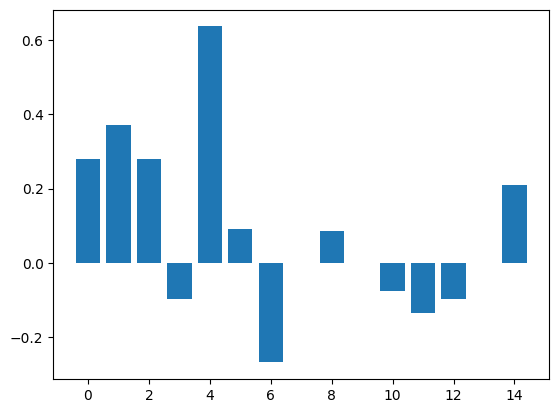

In [78]:
import matplotlib.pyplot as plt

Coef = linear_regressor.coef_
Coef_1d = Coef.flatten()

# summarize feature importance
for i,v in enumerate(Coef_1d):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(Coef_1d))], Coef_1d)
plt.show()

In [57]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial feature

def polynomial_regression(X, y):

    poly = PolynomialFeatures(2)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.7, test_size=0.3, random_state=0)
    
    # Fitting the model
    linreg = LinearRegression(fit_intercept=True, copy_X=True)
    linreg.fit(X_train, y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

#     print("The model parameter (slopes) are\n", linear_regressor.coef_)
#     print(f"\nThe model parameter (intercept) is {linear_regressor.intercept_:.4f}")
    
    print(f"\nThe R2 score is {linreg.score(X_train, y_train):.4f}")

    print(f"\nRMSE train is {rmse_train:.4f}")
    print(f"\nRMSE test is {rmse_test:.4f}")
    
polynomial_regression(X, Y)


The R2 score is 0.7038

RMSE train is 0.0753

RMSE test is 2.2435


Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_regressor = Ridge(fit_intercept=True, copy_X=True)
ridge_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(ridge_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(ridge_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, ridge_regressor.predict(X_test))))

Training accuracy: 0.211
Testing accuracy by using score function: 0.073
Testing accuracy by using r2_score meric: 0.073


In [24]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.1216008   0.29372663  0.23635031 -0.05235841  0.09359117  0.02563372
 -0.226941    0.16744168  0.16859285 -0.02897259]
Mean cross-validation score: 0.080


In [50]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = ridge_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.156


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.26146
Feature: 3, Score: -0.01239
Feature: 4, Score: 0.40508
Feature: 5, Score: -0.00447
Feature: 6, Score: -0.01459
Feature: 7, Score: -0.09445
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.09445
Feature: 10, Score: -0.00360
Feature: 11, Score: -0.08716
Feature: 12, Score: -0.03123
Feature: 13, Score: -0.04254
Feature: 14, Score: 0.00952


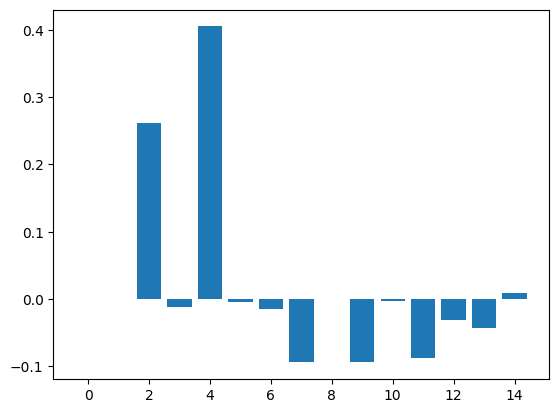

In [58]:
# summarize feature importance
for i,v in enumerate(ridge_regressor.coef_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(ridge_regressor.coef_))], ridge_regressor.coef_)
plt.show()

SGD Regressor

In [47]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(sgd_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(sgd_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, sgd_regressor.predict(X_test))))

Training accuracy: 0.081
Testing accuracy by using score function: 0.013
Testing accuracy by using r2_score meric: 0.013


In [25]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(sgd_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.06889242  0.08663082  0.03771717  0.04496237  0.09556577  0.06706388
 -0.03923117  0.08947179  0.09377546 -0.0331899 ]
Mean cross-validation score: 0.051


In [52]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = sgd_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.161


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00346
Feature: 3, Score: 0.00038
Feature: 4, Score: 0.00927
Feature: 5, Score: 0.00120
Feature: 6, Score: 0.00082
Feature: 7, Score: 0.02564
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02564
Feature: 10, Score: -0.01588
Feature: 11, Score: -0.03100
Feature: 12, Score: -0.01896
Feature: 13, Score: -0.00940
Feature: 14, Score: -0.02365


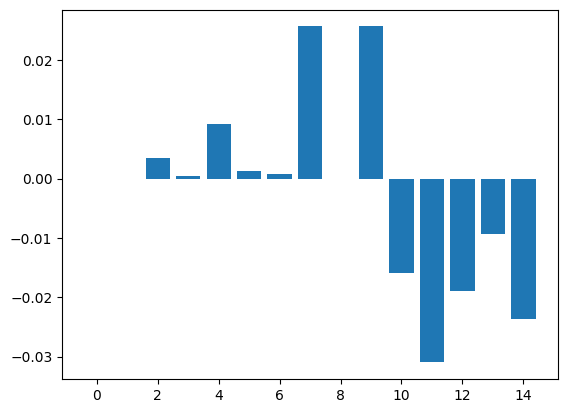

In [59]:
# summarize feature importance
for i,v in enumerate(sgd_regressor.coef_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(sgd_regressor.coef_))], sgd_regressor.coef_)
plt.show()

Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(rf_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(rf_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, rf_regressor.predict(X_test))))

Training accuracy: 0.926
Testing accuracy by using score function: 0.301
Testing accuracy by using r2_score meric: 0.301


/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_14448/2307033513.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [59]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/radheapermatadewi/miniconda3/lib/python3.10/site-packages

Cross-validation scores:  [0.58896433 0.71104939 0.37361339 0.29507604 0.41301171 0.1918745
 0.11136574 0.50528966 0.38127935 0.16358556]
Mean cross-validation score: 0.374


In [60]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.126


Feature: 0, Score: 0.00161
Feature: 1, Score: 0.05519
Feature: 2, Score: 0.36335
Feature: 3, Score: 0.04830
Feature: 4, Score: 0.21605
Feature: 5, Score: 0.09725
Feature: 6, Score: 0.05798
Feature: 7, Score: 0.00647
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00341
Feature: 10, Score: 0.01272
Feature: 11, Score: 0.00986
Feature: 12, Score: 0.03722
Feature: 13, Score: 0.03247
Feature: 14, Score: 0.05811


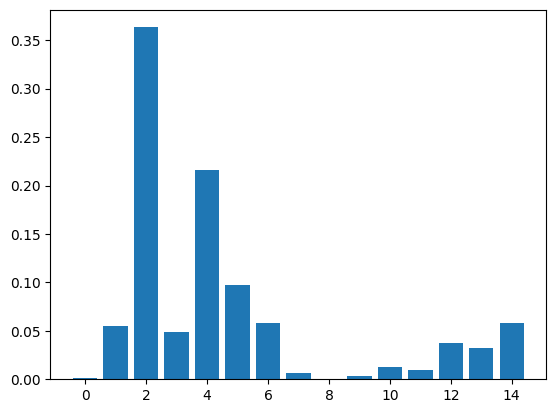

In [64]:
# summarize feature importance
for i,v in enumerate(rf_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rf_regressor.feature_importances_))], rf_regressor.feature_importances_)
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial feature

def polynomial_regression(X, y):

    poly = PolynomialFeatures(2)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.7, test_size=0.3, random_state=0)
    
    # Fitting the model
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

#     print("The model parameter (slopes) are\n", linear_regressor.coef_)
#     print(f"\nThe model parameter (intercept) is {linear_regressor.intercept_:.4f}")
    
    print(f"\nThe R2 score is {rf.score(X_train, y_train):.4f}")

    print(f"\nRMSE train is {rmse_train:.4f}")
    print(f"\nRMSE test is {rmse_test:.4f}")
    
    print(X_poly.shape)
    
polynomial_regression(X, Y)


The R2 score is 0.9272

RMSE train is 0.0337

RMSE test is 0.1233
(839, 136)


Ada Boost Regressor

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

ab_regressor = AdaBoostRegressor()
ab_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(ab_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(ab_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, ab_regressor.predict(X_test))))

Training accuracy: 0.286
Testing accuracy by using score function: 0.096
Testing accuracy by using r2_score meric: 0.096


In [28]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(ab_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.13036521 -0.05950407  0.15012277 -0.95937226  0.16024489  0.05783111
 -1.80719245  0.06709554  0.20207808 -0.11547601]
Mean cross-validation score: -0.217


In [54]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = ab_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.154


Feature: 0, Score: 0.00211
Feature: 1, Score: 0.03534
Feature: 2, Score: 0.28544
Feature: 3, Score: 0.06085
Feature: 4, Score: 0.17418
Feature: 5, Score: 0.12707
Feature: 6, Score: 0.17106
Feature: 7, Score: 0.00805
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.01417
Feature: 10, Score: 0.02042
Feature: 11, Score: 0.00379
Feature: 12, Score: 0.00702
Feature: 13, Score: 0.07973
Feature: 14, Score: 0.01077


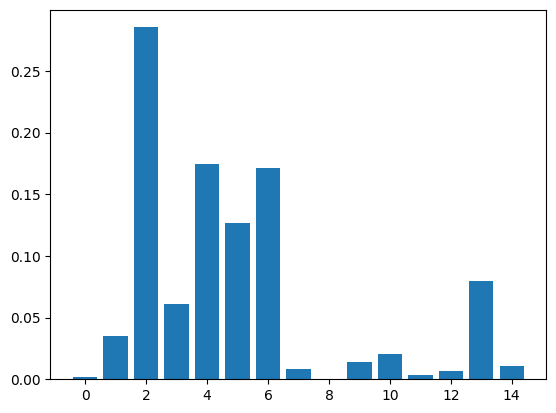

In [63]:
# summarize feature importance
for i,v in enumerate(ab_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(ab_regressor.feature_importances_))], ab_regressor.feature_importances_)
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(gb_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(gb_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, gb_regressor.predict(X_test))))

Training accuracy: 0.942
Testing accuracy by using score function: 0.356
Testing accuracy by using r2_score meric: 0.356


In [29]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross-validation
cv_scores = cross_val_score(gb_regressor, X_train, y_train, cv=10)

# print the cross-validation scores
print('Cross-validation scores: ', cv_scores)

# print the mean of the cross-validation scores
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores:  [ 0.49571346  0.28724248  0.24507075 -2.03940932  0.4923764   0.08233341
  0.03744347  0.36124449  0.33158323  0.42203351]
Mean cross-validation score: 0.072


In [55]:
from sklearn.metrics import mean_squared_error

# make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.130


Feature: 0, Score: 0.00296
Feature: 1, Score: 0.08496
Feature: 2, Score: 0.42482
Feature: 3, Score: 0.02430
Feature: 4, Score: 0.20600
Feature: 5, Score: 0.06851
Feature: 6, Score: 0.04650
Feature: 7, Score: 0.00073
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00911
Feature: 10, Score: 0.00271
Feature: 11, Score: 0.00873
Feature: 12, Score: 0.04522
Feature: 13, Score: 0.01476
Feature: 14, Score: 0.06067


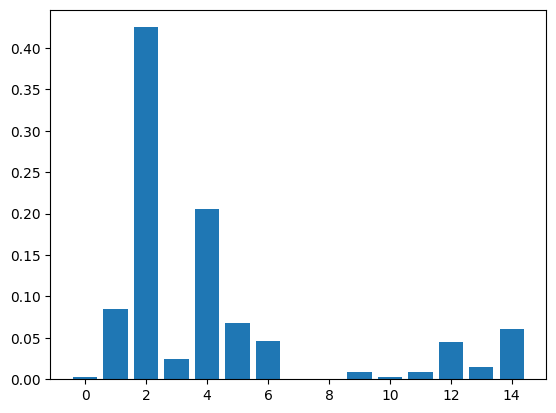

In [65]:
# summarize feature importance
for i,v in enumerate(gb_regressor.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(gb_regressor.feature_importances_))], gb_regressor.feature_importances_)
plt.show()